# USA unlikely to medal

## scaling no improvement

## Grid Search with k-folds cross validation made improvements

['joe fraser', 'kazuma kaya', 'joel plata', 'tin srbic', 'kakeru tanigawa', 'jinseong yun']

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, fbeta_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.dummy import DummyClassifier
import warnings

In [42]:
warnings.filterwarnings("ignore")

In [43]:
df = pd.read_csv('../../Combine_Data/men/hb_encoded.csv')
olymp = pd.read_csv('../../Data/cleandata22-23/encoded_m_olympics_hb.csv')
hbnames = pd.read_csv('../../Data/cleandata22-23/encoded_m_olympics_hbnames.csv')
hbolymp = pd.read_csv('../../Data/cleandata22-23/men22_23.csv')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         502 non-null    int64  
 1   D            502 non-null    float64
 2   E            502 non-null    float64
 3   ND           502 non-null    float64
 4   year         502 non-null    int64  
 5   Total        502 non-null    float64
 6   medal        502 non-null    int64  
 7   Name         502 non-null    int64  
 8   Nation       502 non-null    int64  
 9   round_final  502 non-null    int64  
 10  round_qual   502 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 43.3 KB


In [46]:
df.duplicated().sum()

0

In [5]:
df[df['medal']==1]

,Rank,D,E,ND,year,Total,medal,Name,Nation,round_final,round_qual
6,7,6.1,7.466,-0.3,2019,13.866,1,286,16,1,0
9,2,5.9,8.733,0.0,2019,14.633,1,286,16,0,1
53,4,6.4,8.100,0.0,2018,14.500,1,286,16,1,0
62,5,6.0,8.300,0.0,2018,14.300,1,286,16,0,1
73,16,5.8,8.166,0.0,2018,13.966,1,222,62,0,1
256,2,6.2,8.466,0.0,2019,14.666,1,286,16,1,0
258,4,6.2,8.033,0.0,2019,14.233,1,66,41,1,0
265,3,6.2,8.633,0.0,2019,14.833,1,286,16,0,1
270,8,6.1,8.266,0.0,2019,14.366,1,66,41,0,1
273,11,5.9,8.400,0.0,2019,14.300,1,222,62,0,1


# Base line using ZeroR

In [6]:

X = df.drop(columns=['medal'])  
y = df['medal']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Initialize the ZeroR classifier
zero_r_clf = DummyClassifier(strategy='most_frequent', random_state=42)
zero_r_clf.fit(X_train, y_train)

# Make predictions test data
y_pred = zero_r_clf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("ZeroR Classifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")


ZeroR Classifier
Accuracy: 0.9703
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        98
           1       0.00      0.00      0.00         3

    accuracy                           0.97       101
   macro avg       0.49      0.50      0.49       101
weighted avg       0.94      0.97      0.96       101

Confusion Matrix:
[[98  0]
 [ 3  0]]


# Model Comparison


In [7]:
y = df['medal']
X = df.drop(columns=['medal'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(),
}

results = {}

# Iterate through each classifier
for name, clf in classifiers.items():
    # Create a pipeline with StandardScaler for classifiers that require it
    if name in ["SVM", "K-Nearest Neighbors", "Neural Network"]:
        clf = make_pipeline(StandardScaler(), clf)

    # Fit model to the training data
    clf.fit(X_train, y_train)

    # Make predictions on test data
    y_pred = clf.predict(X_test)

    # Evaluate model's performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    beta = 2
    f2_score = fbeta_score(y_test, y_pred, beta=beta)

    results[name] = {
        "accuracy": accuracy,
        "classification_report": report,
        "confusion_matrix": conf_matrix,
        "f2_score": f2_score,
    }
    
for name, result in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"F2-Score: {result['f2_score']:.4f}")
    print(f"Classification Report:\n{result['classification_report']}")
    print(f"Confusion Matrix:\n{result['confusion_matrix']}\n")


Classifier: Random Forest
Accuracy: 0.9604
F2-Score: 0.0000
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        98
           1       0.00      0.00      0.00         3

    accuracy                           0.96       101
   macro avg       0.48      0.49      0.49       101
weighted avg       0.94      0.96      0.95       101

Confusion Matrix:
[[97  1]
 [ 3  0]]

Classifier: AdaBoost
Accuracy: 0.9802
F2-Score: 0.6667
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        98
           1       0.67      0.67      0.67         3

    accuracy                           0.98       101
   macro avg       0.83      0.83      0.83       101
weighted avg       0.98      0.98      0.98       101

Confusion Matrix:
[[97  1]
 [ 1  2]]

Classifier: SVM
Accuracy: 0.9703
F2-Score: 0.0000
Classification Report:
              precision    recall  f

Classifier: Decision Tree
Accuracy: 0.9870

Classifier: AdaBoost
Accuracy: 0.9870

# Grid Search with k-folds cross validation made improvements

In [8]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Initialize AdaBoost classifier
base_classifier = DecisionTreeClassifier()
clf = AdaBoostClassifier(base_classifier)

# Define parameter grid
param_grid = {
    'n_estimators': [10, 20, 30],
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
    'base_estimator__max_depth': [1, 2, 3]
}

# Initialize StratifiedKFold for k-fold cross-validation
k_folds = 5
stratified_kfold = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=4)

# Create grid search object with StratifiedKFold
grid_search = GridSearchCV(clf, param_grid, cv=stratified_kfold, scoring='accuracy')

# Fit grid search to data
grid_search.fit(X, y)

# Get best estimator from grid search
best_clf = grid_search.best_estimator_

# Iterate over folds for evaluation
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X, y)):
    print(f"\nFold {fold + 1}")

    # Split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model to the training data for this fold
    best_clf.fit(X_train, y_train)

    # Make predictions on test data for this fold
    y_pred = best_clf.predict(X_test)

    # Evaluate the model's performance for this fold
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Best Hyperparameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{report}")
    print(f"Confusion Matrix:\n{conf_matrix}")



Fold 1
Best Hyperparameters: {'base_estimator__max_depth': 2, 'learning_rate': 0.4, 'n_estimators': 10}
Accuracy: 0.9802
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        99
           1       0.00      0.00      0.00         2

    accuracy                           0.98       101
   macro avg       0.49      0.50      0.49       101
weighted avg       0.96      0.98      0.97       101

Confusion Matrix:
[[99  0]
 [ 2  0]]

Fold 2
Best Hyperparameters: {'base_estimator__max_depth': 2, 'learning_rate': 0.4, 'n_estimators': 10}
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00         2

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101

Confusion Matrix:
[

# Feature Importance

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

y = df['medal']
X = df.drop(columns=['medal'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=4)

# Initialize AdaBoost classifier
clf = AdaBoostClassifier(n_estimators=20, learning_rate=0.35)

# Fit model to the training data
clf.fit(X_train, y_train)

# Extract feature importances
feature_importances = clf.feature_importances_

print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")


Feature Importances:
Rank: 0.1500
D: 0.0500
E: 0.0000
ND: 0.0000
year: 0.0000
Total: 0.1500
Name: 0.3500
Nation: 0.3000
round_final: 0.0000
round_qual: 0.0000


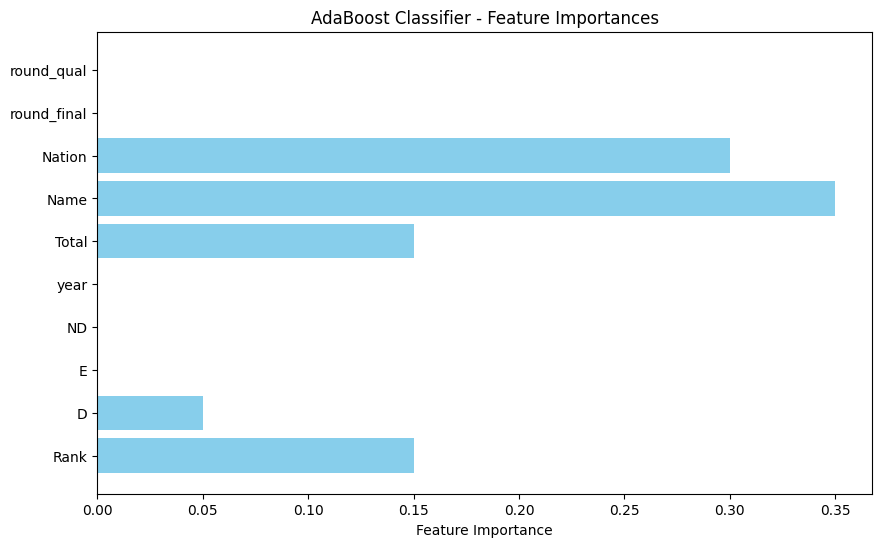

In [10]:
import matplotlib.pyplot as plt


# Extract feature importances
feature_importances = clf.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('AdaBoost Classifier - Feature Importances')
plt.show()


# Model Trained earlier using 2023/2022 data

In [27]:
olymp = pd.read_csv('../../Data/cleandata22-23/encoded_m_olympics_hb.csv')


In [28]:
olymp.rename(columns={'D Score': 'D', 'E Score': 'E',
                     'Pen.': 'ND', 'nation': 'Nation'}, inplace=True)

In [29]:
olymp=olymp.drop(columns=['round_TeamFinal', 'round_AAfinal', 'round_TeamQual'])

In [30]:
desired_column_order = ['Rank', 'D', 'E', 'ND', 'year', 'Total', 'Name', 'Nation',
       'round_final', 'round_qual'] 

# Create DataFrame with the desired column order
olymp = olymp[desired_column_order]
olymp.drop_duplicates(inplace=True)

In [31]:
# y_pred = clf.predict(olymp)

y_pred = best_clf.predict(olymp)


In [32]:
ypreds  = pd.Series(y_pred)
olymp['ypred']=ypreds


In [33]:
olymp['ypred'].value_counts()

0.0    2329
1.0       3
Name: ypred, dtype: int64

In [34]:
filtered_df = olymp[olymp['ypred'] == 1]

In [35]:
filtered_df['Name'].unique()

array([475, 276])

# hbnames used to match encoded names with actual names

In [36]:
# name_encoded_values = [731, 593]

name_encoded_values = [475, 276]
# Filter DataFrame to get the corresponding values
result = hbnames.loc[hbnames['Name_encoded'].isin(name_encoded_values), 'Name']


In [37]:
result.unique()

array(['maxime gentges', 'ilias georgiou'], dtype=object)

# hbolymp used to get country info from name list above

In [38]:
hbolymp["Name"]=hbolymp["Name"].str.lower()

In [39]:
# names_to_filter =['yumin abbadini', 'robert tvorogal']

names_to_filter =['maxime gentges', 'ilias georgiou']

# Filter the DataFrame to get rows with the specified values
result = hbolymp[hbolymp['Name'].isin(names_to_filter)]

In [40]:
result['Country'].value_counts()

CYP    32
BEL    29
Name: Country, dtype: int64